# Importing dependencies

In [51]:
import pandas
import matplotlib.pyplot as plt
from statistics import mean

# Read the csv

In [52]:
reader = pandas.read_csv(r"grades.csv")
print(reader)

   Subject  Grade  Estimated_grade  Estimated_grade_by_bot  \
0     engl   13.0               18               16.833333   
1     engl   16.0               17               16.333333   
2       fr   18.0               18               18.333333   
3    maths   18.5               19               18.687500   
4    maths   19.5               19               18.687500   
5     phys   15.0               17               17.000000   
6     hist   14.0               11               12.500000   
7      NSI   20.0               17               18.250000   
8    maths   16.0               17               17.687500   
9    ESbio   14.0               16               15.000000   
10      fr   20.0               17               17.833333   
11     spa   17.0               13               15.000000   
12    engl   18.0               16               15.833333   
13    phys   19.0               18               17.500000   
14     spa   14.0               16               16.500000   
15    eu

# Function removing nan in lists

In [53]:
def remove_nan(list_1):
    list_2 = []
    for i in list_1 :
        if str(i) != "nan" :
            list_2.append(i)

    return list_2

# Plotting the perfect grade's completion, and draw points for all grades

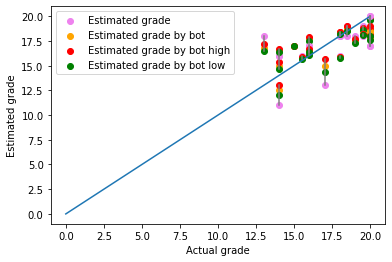

In [54]:
plt.plot([0, 20], [0, 20])

for line in range(len(reader)):
    grade = reader.Grade[line]

    estimated_grade_list = []

    estimated_grade = reader.Estimated_grade[line]

    estimated_grade_by_bot = reader.Estimated_grade_by_bot[line]
    estimated_grade_high = reader.Estimated_grade_by_bot_high[line]
    estimated_grade_low = reader.Estimated_grade_by_bot_low[line]

    estimated_grade_list.append(estimated_grade)
    estimated_grade_list.append(estimated_grade_high)
    estimated_grade_list.append(estimated_grade_low)

    estimated_grade_list.sort()

    # plot estimated grades, estimated grades by bot (high and low), and actual grade
    plt.scatter(grade, estimated_grade, color="violet")

    plt.scatter(grade, estimated_grade_by_bot, color="orange")
    plt.scatter(grade, estimated_grade_high, color="red")
    plt.scatter(grade, estimated_grade_low, color="green")

    plt.plot([grade, grade], [estimated_grade_list[0], estimated_grade_list[-1]], color="grey")

# plot legend with invisible points
plt.scatter([], [], color="violet", label="Estimated grade")
plt.scatter([], [], color="orange", label="Estimated grade by bot")
plt.scatter([], [], color="red", label="Estimated grade by bot high")
plt.scatter([], [], color="green", label="Estimated grade by bot low")

# legend axis
plt.xlabel("Actual grade")
plt.ylabel("Estimated grade")

plt.legend()
plt.show()

# Plotting the error rate for each grade, and for all estimations

Human error rate : 0.03424747101717078
Error rate : 0.4370753746214094
Error rate estimation low : -0.928141325814458
Error rate estimation high : 1.802292075057273


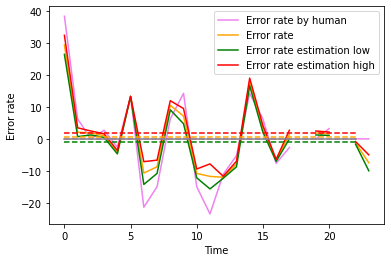

In [55]:
error_rate_list_human = []
error_rate_list = []
error_rate_low_list = []
error_rate_high_list = []

for line in range(len(reader)):
    grade = reader.Grade[line]

    estimated_grade = reader.Estimated_grade[line]

    estimated_grade_by_bot = reader.Estimated_grade_by_bot[line]
    estimated_grade_high = reader.Estimated_grade_by_bot_high[line]
    estimated_grade_low = reader.Estimated_grade_by_bot_low[line]

    error_rate_human = (estimated_grade - grade) / grade * 100
    error_rate = (estimated_grade_by_bot - grade) / grade * 100
    error_rate_high = (estimated_grade_high - grade) / grade * 100
    error_rate_low = (estimated_grade_low - grade) / grade * 100

    error_rate_list_human.append(error_rate_human)
    error_rate_list.append(error_rate)
    error_rate_low_list.append(error_rate_low)
    error_rate_high_list.append(error_rate_high)

# plot error rate
plt.plot(error_rate_list_human, color="violet", label="Error rate by human")
plt.plot(error_rate_list, color="orange", label="Error rate")
plt.plot(error_rate_low_list, color="green", label="Error rate estimation low")
plt.plot(error_rate_high_list, color="red", label="Error rate estimation high")

# remove nan in lists
error_rate_list_human = remove_nan(error_rate_list_human)
error_rate_list = remove_nan(error_rate_list)
error_rate_low_list = remove_nan(error_rate_low_list)
error_rate_high_list = remove_nan(error_rate_high_list)

# plot mean error rate
mean_error_rate_human = mean(error_rate_list_human)
mean_error_rate = mean(error_rate_list)
mean_error_rate_low = mean(error_rate_low_list)
mean_error_rate_high = mean(error_rate_high_list)

# print the mean error rate for each estimation method
print(f"Human error rate : {mean_error_rate_human}")
print(f"Error rate : {mean_error_rate}")
print(f"Error rate estimation low : {mean_error_rate_low}")
print(f"Error rate estimation high : {mean_error_rate_high}")

plt.plot([0, len(error_rate_list_human)], [mean_error_rate_human, mean_error_rate_human], color="violet", linestyle="--")
plt.plot([0, len(error_rate_list_human)], [mean_error_rate, mean_error_rate], color="orange", linestyle="--")
plt.plot([0, len(error_rate_list_human)], [mean_error_rate_low, mean_error_rate_low], color="green", linestyle="--")
plt.plot([0, len(error_rate_list_human)], [mean_error_rate_high, mean_error_rate_high], color="red", linestyle="--")

# plot the perfect line
plt.plot([0, len(error_rate_list)], [0, 0], color="grey")

plt.xlabel("Time")
plt.ylabel("Error rate")

plt.legend()
plt.show()